In [27]:
import numpy as np
import pandas as pd
import networkx as nx
from scipy.special import gammaln
import matplotlib.pyplot as plt
import time
import math
import random
from functions_scoring import count_func
from functions_scoring import score_func
import csv

In [107]:
random.choices(df_vars)

['survived']

In [435]:
d = pd.read_csv("data/medium.csv")

In [383]:
df_vars = d.columns
# Create undirected graph
G = nx.Graph()
G.add_nodes_from(df_vars)

# Create directed graph from G
#H = nx.DiGraph(G)

# H.add_edges_from([("fare","passengerclass"),("passengerclass","numparentschildren"),
# ("numparentschildren","fare")])



In [175]:
test = False

H = nx.DiGraph(G)
iter = 0
while test == False:
    #print("hi")
    edges = list()

    H.remove_edges_from(list(H.edges()))

    for i in range(3):
        temp = tuple([random.choices(df_vars,k=2)])
        edges.append(temp[0])
        #print(temp)
    
    H.add_edges_from(edges)
    test = nx.is_directed_acyclic_graph(H)
    iter += 1
    if iter > 10000:
        break


In [176]:
nx.is_directed_acyclic_graph(H)


True

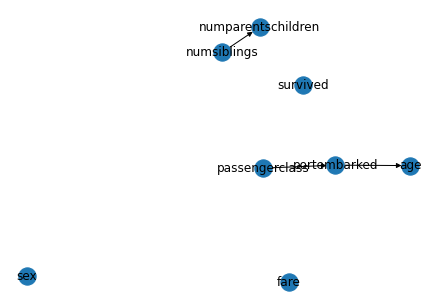

In [177]:

nx.draw(H, with_labels = True)

In [178]:
df = count_func(d,H)

In [179]:
score_func(df)

-4078.228065135516

In [2]:
def random_neighbor(graph):
    
    nodes = list(graph.nodes())
    #print(nodes)
    i = random.sample(nodes,k=2)
    #nodes1 = list(nodes)
    #nodes.remove(i[0])
    #nodes.remove(i[1])

    nb = list(graph.neighbors(i[0]))
    
    edge_add = list([i[0],i[1]])
    #print(edge_add)

    if i[1] in nb:
        graph.remove_edge(i[0],i[1])

    else:
        graph.add_edge(i[0],i[1])

        if nx.is_directed_acyclic_graph(graph) == False:
            graph.remove_edge(i[0],i[1])

    return graph

In [3]:
#
random_neighbor(H)


NameError: name 'H' is not defined

In [400]:
ct = count_func(d,dag = H)
score_func(ct)

-4124.20540708865

In [364]:
list([1,2])

[1, 2]

In [57]:
d = pd.read_csv("data/large.csv")
df_vars = d.columns
# Create undirected graph
G = nx.Graph()
G.add_nodes_from(df_vars)
60 *d.shape[1]

3000

In [60]:
iter = 0
width = d.shape[1]
iter_init = int(3*width)
iter_count = 0
score = -math.inf
H = nx.DiGraph(G)

while iter_count < 200:

    H.remove_edges_from(list(H.edges))

    print(iter_count,iter_init)

    while iter < iter_init:
        gph = random_neighbor(H)
        df = count_func(d,gph)
        score_new = score_func(df)

        if score_new > score:
            score = score_new
            iter = 0
            iter_init = int(6*width)
            print(score)
            H_best = H.copy()

        else:
            #print(iter, iter_init)
            iter += 1
    
    iter_count += 1
    iter = 0
    iter_init = int(3* width)
        

0 150
-550951.814965775
-550936.490927533
-550911.1100101348
-550881.5804837567
-550761.1506834482
-550759.1722971008
-550715.0869506863
-550040.4555023555
-549781.767972798
1 150
-548474.8646306761
-548007.2398069138
-547960.5356486018
-547788.4775284848
-547738.2129217808
-547708.5412535963
-547564.672566867
2 150
3 150
4 150
-547556.9432882972
-544271.4747044798
-543721.6116571537
-543549.9972890633
-543519.380874578
5 150
6 150
7 150
8 150
9 150
10 150
11 150
12 150
-542265.7712791654
-541291.7228585825
13 150
14 150
15 150
16 150
17 150
18 150
19 150
20 150
21 150
22 150
23 150
24 150
25 150
26 150
27 150
28 150
29 150
30 150
31 150
32 150
33 150
34 150
35 150
36 150
37 150


KeyboardInterrupt: 

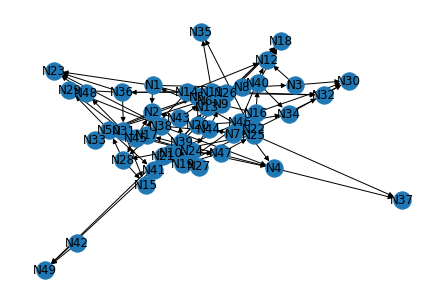

In [63]:
nx.draw(H_best, with_labels = True)

In [61]:
score_func(count_func(d,H_best))

-541291.7228585827

In [62]:
nx.is_directed_acyclic_graph(H_best)

True

In [37]:
def write_gph(dag, idx2names, filename):
    with open(filename, 'w', newline="") as f:
        writer = csv.writer(f)
        writer.writerows(np.array(dag.edges()))


In [38]:
lst = dict(enumerate(df_vars))

In [49]:
test = np.array(H.edges).sort(axis = 0)
print(test)

None


In [64]:
write_gph(H_best,idx2names=lst,filename="large.gph")

In [34]:
np.array(H.edges())

array([['age', 'survived'],
       ['portembarked', 'fare'],
       ['numparentschildren', 'survived'],
       ['numparentschildren', 'age'],
       ['passengerclass', 'survived'],
       ['passengerclass', 'fare'],
       ['passengerclass', 'numsiblings'],
       ['passengerclass', 'portembarked'],
       ['passengerclass', 'age'],
       ['passengerclass', 'numparentschildren'],
       ['sex', 'survived'],
       ['numsiblings', 'portembarked'],
       ['numsiblings', 'fare'],
       ['survived', 'portembarked']], dtype='<U18')